In [ ]:
import pandas as pd
from pandasgui import show
import os

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

flow_pt_to_es = pd.read_pickle("../.data_cache/flow_pt_to_es.pkl.gz")
flow_es_to_pt = pd.read_pickle("../.data_cache/flow_es_to_pt.pkl.gz")
generation_pt = pd.read_pickle("../.data_cache/generation_pt.pkl.gz")
generation_es = pd.read_pickle("../.data_cache/generation_es.pkl.gz")

# Show all dataframes using pandasgui
show(flow_pt_to_es)
show(flow_es_to_pt) 
show(generation_pt)
show(generation_es)






: 

In [ ]:
# # Change cache file format

# import pandas as pd
# import os

# import warnings
# warnings.filterwarnings('ignore', category=FutureWarning)

# flow_pt_to_es = pd.read_pickle("../.data_cache/flow_pt_to_es.pkl.gz")
# flow_es_to_pt = pd.read_pickle("../.data_cache/flow_es_to_pt.pkl.gz")
# generation_pt = pd.read_pickle("../.data_cache/generation_pt.pkl.gz")
# generation_es = pd.read_pickle("../.data_cache/generation_es.pkl.gz")

# # Save dataframes to pickle in .data_cache directory
# flow_pt_to_es.to_pickle("../.data_cache/flow_pt_to_es.pkl.gz", compression={'method': 'gzip', 'compresslevel': 1, "mtime": 0})
# flow_es_to_pt.to_pickle("../.data_cache/flow_es_to_pt.pkl.gz", compression={'method': 'gzip', 'compresslevel': 1, "mtime": 0}) 
# generation_pt.to_pickle("../.data_cache/generation_pt.pkl.gz", compression={'method': 'gzip', 'compresslevel': 1, "mtime": 0})
# generation_es.to_pickle("../.data_cache/generation_es.pkl.gz", compression={'method': 'gzip', 'compresslevel': 1, "mtime": 0})

In [2]:
from datetime import datetime, timedelta

def check_continuous_hours(df, name):
    min_date = df['start_time'].min()
    max_date = df['start_time'].max()
    
    print(f"\n{name}:")
    print(f"Start date min: {min_date}")
    print(f"Start date max: {max_date}")
    
    # Generate expected datetime range with hourly frequency
    expected_dates = pd.date_range(start=min_date, end=max_date, freq='H')
    
    # Convert df dates to set for efficient lookup
    actual_dates = set(df['start_time'])
    
    # Find missing dates
    missing_dates = set(expected_dates) - actual_dates
    
    if missing_dates:
        print(f"Missing {len(missing_dates)} hours:")
        for date in sorted(missing_dates)[:10]:  # Show first 10 missing dates
            print(date)
        if len(missing_dates) > 10:
            print("...")
    else:
        print("All hours present - continuous data")

# Check each dataframe
check_continuous_hours(flow_pt_to_es, "Flow PT to ES")
check_continuous_hours(flow_es_to_pt, "Flow ES to PT") 
check_continuous_hours(generation_pt, "Generation PT")
check_continuous_hours(generation_es, "Generation ES")



Flow PT to ES:
Start date min: 2015-01-10 00:00:00
Start date max: 2024-10-29 23:00:00
All hours present - continuous data

Flow ES to PT:
Start date min: 2015-01-10 00:00:00
Start date max: 2024-10-29 23:00:00
All hours present - continuous data

Generation PT:
Start date min: 2015-01-10 00:00:00
Start date max: 2024-10-29 23:00:00
All hours present - continuous data

Generation ES:
Start date min: 2015-01-10 00:00:00
Start date max: 2024-10-29 23:00:00
All hours present - continuous data


In [3]:
def check_nans(df, name):
    print(f"\n{name}:")
    
    # Get total number of NaN values
    total_nans = df.isna().sum().sum()
    
    if total_nans > 0:
        print(f"Total NaN values: {total_nans}")
        # Show NaN counts by column
        nan_counts = df.isna().sum()
        nan_columns = nan_counts[nan_counts > 0]
        print("\nNaN counts by column:")
        for col, count in nan_columns.items():
            print(f"{col}: {count}")
    else:
        print("No NaN values found")

# Check each dataframe
check_nans(flow_pt_to_es, "Flow PT to ES")
check_nans(flow_es_to_pt, "Flow ES to PT")
check_nans(generation_pt, "Generation PT") 
check_nans(generation_es, "Generation ES")



Flow PT to ES:
No NaN values found

Flow ES to PT:
No NaN values found

Generation PT:
Total NaN values: 47254

NaN counts by column:
B18: 47254

Generation ES:
Total NaN values: 69867

NaN counts by column:
B01: 23
B02: 23
B03: 23
B04: 23
B05: 23
B06: 23
B07: 23
B08: 23
B09: 23
B11: 23
B12: 23
B13: 24
B14: 23
B15: 23
B16: 23
B17: 23
B18: 23
B19: 23
B20: 23
B10: 69429


In [4]:
def show_nan_examples(df, name, n=5):
    print(f"\n{name}:")
    
    # Get columns with NaN values
    nan_columns = df.columns[df.isna().any()].tolist()
    
    if not nan_columns:
        print("No NaN values found")
        return
        
    print("\nExample dates with NaN values:")
    for col in nan_columns:
        nan_dates = df[df[col].isna()]['start_time'].head(n)
        if not nan_dates.empty:
            print(f"\n{col}:")
            for date in nan_dates:
                print(date)

# Check each dataframe                
show_nan_examples(flow_pt_to_es, "Flow PT to ES")
show_nan_examples(flow_es_to_pt, "Flow ES to PT")
show_nan_examples(generation_pt, "Generation PT")
show_nan_examples(generation_es, "Generation ES")



Flow PT to ES:
No NaN values found

Flow ES to PT:
No NaN values found

Generation PT:

Example dates with NaN values:

B18:
2015-01-10 00:00:00
2015-01-10 01:00:00
2015-01-10 02:00:00
2015-01-10 03:00:00
2015-01-10 04:00:00

Generation ES:

Example dates with NaN values:

B01:
2015-01-19 18:00:00
2015-01-19 19:00:00
2015-01-27 18:00:00
2015-01-28 12:00:00
2015-02-10 10:00:00

B02:
2015-01-19 18:00:00
2015-01-19 19:00:00
2015-01-27 18:00:00
2015-01-28 12:00:00
2015-02-10 10:00:00

B03:
2015-01-19 18:00:00
2015-01-19 19:00:00
2015-01-27 18:00:00
2015-01-28 12:00:00
2015-02-10 10:00:00

B04:
2015-01-19 18:00:00
2015-01-19 19:00:00
2015-01-27 18:00:00
2015-01-28 12:00:00
2015-02-10 10:00:00

B05:
2015-01-19 18:00:00
2015-01-19 19:00:00
2015-01-27 18:00:00
2015-01-28 12:00:00
2015-02-10 10:00:00

B06:
2015-01-19 18:00:00
2015-01-19 19:00:00
2015-01-27 18:00:00
2015-01-28 12:00:00
2015-02-10 10:00:00

B07:
2015-01-19 18:00:00
2015-01-19 19:00:00
2015-01-27 18:00:00
2015-01-28 12:00:00
2015

if just one column without data -> it's fine
if whole hour without data -> discard hour


In [1]:
import sys
import os
import pandas as pd

sys.path.append(os.path.join(os.getcwd(), '..', 'src'))

flow_es_to_pt = pd.read_pickle("../.data_cache/flow_es_to_pt.pkl.gz")
flow_pt_to_es = pd.read_pickle("../.data_cache/flow_pt_to_es.pkl.gz")
flow_fr_to_es = pd.read_pickle("../.data_cache/flow_fr_to_es.pkl.gz")
flow_es_to_fr = pd.read_pickle("../.data_cache/flow_es_to_fr.pkl.gz")

flow_es_to_pt = flow_es_to_pt.fillna(0)
flow_pt_to_es = flow_pt_to_es.fillna(0)
flow_fr_to_es = flow_fr_to_es.fillna(0)
flow_es_to_fr = flow_es_to_fr.fillna(0)

print("es - pt:", ((flow_es_to_pt["Power"]*flow_pt_to_es["Power"]) == 0).all()) 
print("es - fr:", ((flow_es_to_fr["Power"]*flow_fr_to_es["Power"]) == 0).all())

print("\nCases where both flows are non-zero between ES-PT:")
mask_pt = (flow_es_to_pt["Power"]*flow_pt_to_es["Power"]) != 0
if mask_pt.any():
    conflicting_pt = pd.DataFrame({
        'ES->PT': flow_es_to_pt.loc[mask_pt, "Power"],
        'PT->ES': flow_pt_to_es.loc[mask_pt, "Power"]
    })
    print(conflicting_pt)
else:
    print("No conflicts found")

print("\nCases where both flows are non-zero between ES-FR:")    
mask_fr = (flow_es_to_fr["Power"]*flow_fr_to_es["Power"]) != 0
if mask_fr.any():
    conflicting_fr = pd.DataFrame({
        'ES->FR': flow_es_to_fr.loc[mask_fr, "Power"],
        'FR->ES': flow_fr_to_es.loc[mask_fr, "Power"]
    })
    print(conflicting_fr)
else:
    print("No conflicts found")

print("\nFraction of entries that don't verify the condition (both flows non-zero):")
print("ES-PT:", (mask_pt).mean())
print("ES-FR:", (mask_fr).mean())


es - pt: False
es - fr: False

Cases where both flows are non-zero between ES-PT:
       ES->PT  PT->ES
64592   377.0   153.0
64603    41.0   846.0
64605   557.0    93.0
64613    55.0   886.0
64699   174.0   137.0
...       ...     ...
86280    28.0    22.0
86285    40.0    41.0
86290   198.0   178.0
86291    71.0    27.0
86292    21.0   179.0

[1912 rows x 2 columns]

Cases where both flows are non-zero between ES-FR:
       ES->FR   FR->ES
64608  114.00    18.00
64609  110.00    12.00
64610   91.00    14.00
64622   34.00    35.00
64626  269.00  1090.00
...       ...      ...
86284   91.50    22.50
86286  129.25   130.75
86287  108.75    12.75
86300   20.50   637.50
86301   76.00   201.75

[1417 rows x 2 columns]

Fraction of entries that don't verify the condition (both flows non-zero):
ES-PT: 0.02215450216099093
ES-FR: 0.016418896214500076


In [5]:
print("\nSum of flows when both are non-zero:")
if mask_pt.any():
    print("ES-PT:", (conflicting_pt['ES->PT'] + conflicting_pt['PT->ES']).to_string())
else:
    print("ES-PT: No conflicts to sum")
    
if mask_fr.any():
    print("ES-FR:", (conflicting_fr['ES->FR'] + conflicting_fr['FR->ES']).to_string()) 
else:
    print("ES-FR: No conflicts to sum")




Sum of flows when both are non-zero:
ES-PT: 64592     530.0
64603     887.0
64605     650.0
64613     941.0
64699     311.0
64700     133.0
64723     278.0
64724      97.0
64735     792.0
64746     649.0
64749     527.0
64756     365.0
64759     505.0
64770     354.0
64772     583.0
64780     338.0
64783     505.0
64794     595.0
64797     695.0
64802      87.0
64807     771.0
64818     183.0
64822      53.0
64828     376.0
64831     672.0
64916      14.0
64939      71.0
64948     174.0
64950     398.0
64972     619.0
64975     689.0
64999     475.0
65007     520.0
65013     362.0
65082     228.0
65084     422.0
65093     177.0
65094      67.0
65107     187.0
65182     554.0
65183     478.0
65203     417.0
65204     242.0
65228     277.0
65229      71.0
65236     192.0
65251     454.0
65253     811.0
65261     242.0
65262     216.0
65347     595.0
65352     530.0
65371     301.0
65373     533.0
65374     347.0
65375     207.0
65395     374.0
65397     641.0
65419     336.0
65420      

In [1]:
import plotly.express as px
df = px.data.tips()

In [2]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [2]:
df = px.data.gapminder().query("year == 2007")
df

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
11,Afghanistan,Asia,2007,43.828,31889923,974.580338,AFG,4
23,Albania,Europe,2007,76.423,3600523,5937.029526,ALB,8
35,Algeria,Africa,2007,72.301,33333216,6223.367465,DZA,12
47,Angola,Africa,2007,42.731,12420476,4797.231267,AGO,24
59,Argentina,Americas,2007,75.320,40301927,12779.379640,ARG,32
...,...,...,...,...,...,...,...,...
1655,Vietnam,Asia,2007,74.249,85262356,2441.576404,VNM,704
1667,West Bank and Gaza,Asia,2007,73.422,4018332,3025.349798,PSE,275
1679,"Yemen, Rep.",Asia,2007,62.698,22211743,2280.769906,YEM,887
1691,Zambia,Africa,2007,42.384,11746035,1271.211593,ZMB,894


findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Micro Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Micro Hei
C:\Users\diogo\AppData\Local\Temp\ipykernel_25396\861191258.py:25: UserWarning: Glyph 20010 (\N{CJK UNIFIED IDEOGRAPH-4E2A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Micro Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Micro Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Micro Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Micro Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuan

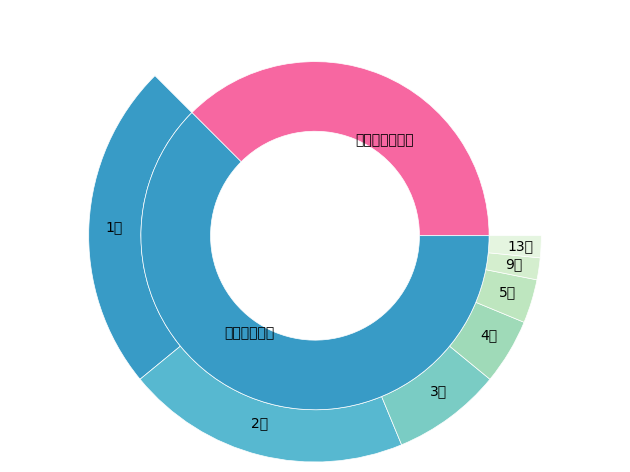

In [2]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.rcParams['font.sans-serif'] = ['WenQuanYi Micro Hei']
plt.rcParams['legend.fontsize'] = 14

group_names = ['不依赖其他条目', '依赖其他条目']
group_size = [24, 40]
subgroup_names = ['', '1个', '2个', '3个', '4个', '5个', '9个', '13个']
subgroup_size = [24, 15, 13, 5, 3, 2, 1, 1]

a, b, c = [plt.cm.RdPu, plt.cm.GnBu, plt.cm.Greys]

fig, ax = plt.subplots()
ax.axis('equal')

mypie, _ = ax.pie(subgroup_size, radius=1.3, labels=subgroup_names, labeldistance=0.85, colors=[c(0.0), b(0.7), b(0.6), b(0.5), b(0.4), b(0.3), b(0.2), b(0.1)])
plt.setp(mypie, width=0.3, edgecolor='white')

mypie2, _ = ax.pie(group_size, radius=1.3-0.3, labels=group_names, colors=[a(0.5), b(0.7)], labeldistance=0.6)
plt.setp(mypie2, width=0.4, edgecolor='white')

plt.margins(0, 0)

plt.tight_layout()
plt.savefig('sunburst.png')

In [ ]:
import plotly.graph_objects as go
import plotly.

# Combine data into a single Sunburst trace
labels = ["A", "B", "C", "D", "E", "F", "G", "H"]
parents = ["", "A", "A", "B", "B", "", "F", "F"]
values = [10, 20, 30, 40, 50, 15, 25, 35]

fig = go.Figure(go.Sunburst(
    labels=labels,
    parents=parents,
    values=values,
    branchvalues="total"
))

fig.update_layout(margin=dict(t=0, l=0, r=0, b=0))
fig.show()

